# TP Machine Learning: Segmentation des communes d'Île-de-france 


# Introduction
Afin d’aider les pouvoirs publics à mieux orienter leurs décisions vous êtes solliciter à montrer s’il
existe des classes de communes ayant des caractéristiques proches. On obtiendra ainsi une typologie
des communes d’Île-de-France et on pourra représenter ces groupes visuellement.
Les données que nous utilisons sont des données sur les communes d’Île-de-France et leurs caractéristiques sociodémographiques.

In [ ]:

! pip install jupyter-dash
! pip install  gdown
! pip install  plotly
! pip install  kneed

     |████████████████████████████████| 7.3 MB 4.3 MB/s 
     |████████████████████████████████| 26.5 MB 1.3 MB/s 
     |████████████████████████████████| 357 kB 50.7 MB/s 
  Created wheel for dash-core-components: filename=dash_core_components-2.0.0-py3-none-any.whl size=3821 sha256=e030a828797356a74670644c8fdbd128e6151fa4e4c7e02bc01eb667bd3923d0
  Stored in directory: /root/.cache/pip/wheels/00/f9/c7/1a6437d794ed753ea9bc9079e761d4fc803a1f1f5d3697b9ec
  Created wheel for dash-html-components: filename=dash_html_components-2.0.0-py3-none-any.whl size=4089 sha256=ea5a9374d79123f9d708de4aea2cf558b6f25c76fa2e7542895ed427a7a2b580
  Stored in directory: /root/.cache/pip/wheels/ec/6b/81/05aceabd8b27f724e2c96784016287cc1bfbc349ebfda451de
  Created wheel for dash-table: filename=dash_table-5.0.0-py3-none-any.whl size=3911 sha256=711be54f385f6c9b4795fec1e89735cb42bc20d88c437231b83f2f58c331440a
  Stored in directory: /root/.cache/pip/wheels/85/5d/4e/7c276b57992951dbe770bf5caad6448d0539c510663aef

# Chargement des bibliothèques pour l'étude de cas.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from bokeh.transform import linear_cmap
from bokeh.palettes import Plasma256 as palette
from bokeh.models import ColorBar

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



# Importer les données du fichier base-comparateur-de-territoires.csv 

In [ ]:
! gdown --id 1f3saJ6cefP_UUSZ4Qi9M488rNrU6nSS1

Downloading...
From: https://drive.google.com/uc?id=1f3saJ6cefP_UUSZ4Qi9M488rNrU6nSS1
To: /content/base-comparateur-de-territoires.csv
100% 2.43M/2.43M [00:00<00:00, 77.6MB/s]


In [ ]:
data= pd.read_csv('base-comparateur-de-territoires.csv', sep = ";")

# Examinez la structure de data frame

In [ ]:
data.dtypes

CODGEO             int64
LIBGEO            object
REG                int64
DEP                int64
P14_POP          float64
P09_POP          float64
SUPERF           float64
NAIS0914         float64
DECE0914         float64
P14_MEN          float64
NAISD16          float64
DECESD16         float64
P14_LOG          float64
P14_RP           float64
P14_RSECOCC      float64
P14_LOGVAC       float64
P14_RP_PROP      float64
NBMENFISC14      float64
PIMP14           float64
MED14            float64
TP6014           float64
P14_EMPLT        float64
P14_EMPLT_SAL    float64
P09_EMPLT        float64
P14_POP1564      float64
P14_CHOM1564     float64
P14_ACT1564      float64
ETTOT15          float64
ETAZ15           float64
ETBE15           float64
ETFZ15           float64
ETGU15           float64
ETGZ15           float64
ETOQ15           float64
ETTEF115         float64
ETTEFP1015       float64
Geo Shape         object
geo_point_2d      object
dtype: object

# Visualiser l'ensemble de données

In [ ]:
data.head()

,CODGEO,LIBGEO,REG,DEP,P14_POP,P09_POP,SUPERF,NAIS0914,DECE0914,P14_MEN,NAISD16,DECESD16,P14_LOG,P14_RP,P14_RSECOCC,P14_LOGVAC,P14_RP_PROP,NBMENFISC14,PIMP14,MED14,TP6014,P14_EMPLT,P14_EMPLT_SAL,P09_EMPLT,P14_POP1564,P14_CHOM1564,P14_ACT1564,ETTOT15,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015,Geo Shape,geo_point_2d
0,95555,Saint-Gratien,11,95,20996.0,20258.0,2.42,1564.0,749.0,8909.817815,257.0,156.0,9337.392497,8909.817815,56.919890,370.654792,4479.402681,8217.0,67.761158,21552.857143,14.972881,3831.135105,3224.519672,3516.342843,13417.955458,1387.832340,10146.844242,1475.0,3.0,38.0,142.0,1078.0,225.0,214.0,335.0,67.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.274621...","48.9695044801, 2.28470111182"
1,95488,Pierrelaye,11,95,8155.0,7920.0,9.21,639.0,243.0,2891.000000,152.0,46.0,3086.000000,2891.000000,11.000000,184.000000,1591.000000,2903.0,66.586290,21415.277778,14.387392,3039.646367,2661.250427,2898.932365,5476.000000,509.000000,4044.000000,878.0,8.0,47.0,135.0,623.0,241.0,65.0,228.0,72.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.193617...","49.0190794714, 2.1606870483"
2,95543,Saint-Cyr-en-Arthies,11,95,242.0,229.0,3.89,9.0,4.0,93.154812,1.0,1.0,106.271929,93.154812,7.063063,6.054054,86.066946,96.0,NaN,25937.142857,NaN,25.112024,18.060819,16.867783,141.757322,9.112971,109.355649,13.0,2.0,0.0,2.0,5.0,2.0,4.0,4.0,0.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.732068...","49.058878265, 1.74176317637"
3,95523,La Roche-Guyon,11,95,446.0,447.0,4.61,18.0,21.0,186.507593,0.0,6.0,267.570530,186.507593,49.216783,31.846154,113.442763,185.0,NaN,21100.000000,NaN,372.590626,338.427249,505.753210,280.164177,24.995863,204.811694,74.0,0.0,6.0,6.0,48.0,17.0,14.0,13.0,4.0,"{""type"": ""Polygon"", ""coordinates"": [[[1.623323...","49.0883415268, 1.63442788467"
4,95678,Villiers-Adam,11,95,838.0,828.0,9.82,45.0,29.0,340.831981,5.0,9.0,364.250976,340.831981,9.860629,13.558365,299.077636,327.0,NaN,28242.000000,NaN,102.752654,83.329975,78.177577,516.588644,33.986095,400.064890,75.0,6.0,3.0,8.0,53.0,12.0,5.0,14.0,2.0,"{""type"": ""Polygon"", ""coordinates"": [[[2.236020...","49.0697597649, 2.23847351378"


In [ ]:
data.shape

(1300, 38)

In [ ]:
data.columns

Index(['CODGEO', 'LIBGEO', 'REG', 'DEP', 'P14_POP', 'P09_POP', 'SUPERF',
       'NAIS0914', 'DECE0914', 'P14_MEN', 'NAISD16', 'DECESD16', 'P14_LOG',
       'P14_RP', 'P14_RSECOCC', 'P14_LOGVAC', 'P14_RP_PROP', 'NBMENFISC14',
       'PIMP14', 'MED14', 'TP6014', 'P14_EMPLT', 'P14_EMPLT_SAL', 'P09_EMPLT',
       'P14_POP1564', 'P14_CHOM1564', 'P14_ACT1564', 'ETTOT15', 'ETAZ15',
       'ETBE15', 'ETFZ15', 'ETGU15', 'ETGZ15', 'ETOQ15', 'ETTEF115',
       'ETTEFP1015', 'Geo Shape', 'geo_point_2d'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CODGEO         1300 non-null   int64  
 1   LIBGEO         1300 non-null   object 
 2   REG            1300 non-null   int64  
 3   DEP            1300 non-null   int64  
 4   P14_POP        1297 non-null   float64
 5   P09_POP        1297 non-null   float64
 6   SUPERF         1297 non-null   float64
 7   NAIS0914       1297 non-null   float64
 8   DECE0914       1297 non-null   float64
 9   P14_MEN        1297 non-null   float64
 10  NAISD16        1296 non-null   float64
 11  DECESD16       1296 non-null   float64
 12  P14_LOG        1297 non-null   float64
 13  P14_RP         1297 non-null   float64
 14  P14_RSECOCC    1297 non-null   float64
 15  P14_LOGVAC     1297 non-null   float64
 16  P14_RP_PROP    1297 non-null   float64
 17  NBMENFISC14    1280 non-null   float64
 18  PIMP14  

# Préparation des données


**Enlever les variables avec trop de données manquantes**

In [ ]:
data.isna().sum()


CODGEO             0
LIBGEO             0
REG                0
DEP                0
P14_POP            3
P09_POP            3
SUPERF             3
NAIS0914           3
DECE0914           3
P14_MEN            3
NAISD16            4
DECESD16           4
P14_LOG            3
P14_RP             3
P14_RSECOCC        3
P14_LOGVAC         3
P14_RP_PROP        3
NBMENFISC14       20
PIMP14           739
MED14             20
TP6014           838
P14_EMPLT          3
P14_EMPLT_SAL      3
P09_EMPLT          0
P14_POP1564        3
P14_CHOM1564       3
P14_ACT1564        3
ETTOT15            1
ETAZ15             1
ETBE15             1
ETFZ15             1
ETGU15             1
ETGZ15             1
ETOQ15             1
ETTEF115           1
ETTEFP1015         1
Geo Shape          3
geo_point_2d       3
dtype: int64

In [ ]:
data.drop(["PIMP14","TP6014"],axis=1,inplace=True)

**Enlever les observations avec des données manquantes**


In [ ]:
data.dropna(inplace=True)

**Extraire dans notre DataFrame la position géographique des comunes**


In [ ]:
position=pd.DataFrame(data["geo_point_2d"])
#Extraction de libele
lib = data['LIBGEO']

**création d' une colonne longitude en prenant la première partie de la colonne geo_point_2**


In [ ]:
position["longitude"]=pd.to_numeric(position["geo_point_2d"].str.split(',')\
                                    .str.get(0))

**création d'une colonne latitude**

In [ ]:
position["latitude"]=pd.to_numeric(position["geo_point_2d"].str.split(',')\
                                   .str.get(1))

**Suppréssion des variables inutiles**

In [ ]:
data.drop(['CODGEO', 'LIBGEO', 'DEP', 'REG', 'Geo Shape', 'geo_point_2d'], axis = 1, inplace = True)

**Remplissage des valeurs manquantes par la méthode KNNImputer.**

In [ ]:
for col in data.columns:
  imputer = KNNImputer(missing_values = np.nan, n_neighbors = 3)
  data[col] = imputer.fit_transform(data[col].values.reshape(-1, 1))

In [ ]:
data.describe()

,P14_POP,P09_POP,SUPERF,NAIS0914,DECE0914,P14_MEN,NAISD16,DECESD16,P14_LOG,P14_RP,P14_RSECOCC,P14_LOGVAC,P14_RP_PROP,NBMENFISC14,MED14,P14_EMPLT,P14_EMPLT_SAL,P09_EMPLT,P14_POP1564,P14_CHOM1564,P14_ACT1564,ETTOT15,ETAZ15,ETBE15,ETFZ15,ETGU15,ETGZ15,ETOQ15,ETTEF115,ETTEFP1015
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,9413.874706,9179.494910,9.323430,712.313234,279.591229,3971.063235,139.364918,58.428348,4397.833319,3971.063235,147.228208,279.541876,1882.640950,3792.597494,24944.495006,4447.328939,3971.490223,4422.769170,6257.409886,601.077035,4764.258279,1092.431480,5.560689,35.927956,92.197338,836.868442,158.897416,121.877056,241.744714,60.845732
std,21642.243680,21382.449491,7.775826,1693.974233,661.208292,10187.184671,330.715326,134.636195,11609.169707,10187.184671,747.443060,863.015181,3776.249122,9415.048759,4231.807962,14486.456619,12891.518395,14493.829619,14763.196686,1568.288639,11335.415754,3975.107291,5.961117,109.999706,228.852210,3334.203671,462.950028,375.468098,892.311890,197.761245
min,97.000000,78.000000,0.700000,3.000000,0.000000,35.272727,0.000000,0.000000,42.272727,35.272727,0.000000,0.000000,21.481481,38.000000,13060.000000,4.966443,0.993289,5.910597,65.646465,2.000000,50.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,582.000000,562.000000,4.790000,29.000000,14.000000,214.014706,5.000000,3.000000,252.575622,214.014706,10.000000,14.162162,182.482993,215.000000,22390.400000,72.422441,49.474241,68.011546,383.090909,23.350097,296.732484,47.000000,2.000000,2.000000,6.000000,28.000000,6.000000,5.000000,9.000000,1.000000
50%,1425.000000,1395.000000,7.770000,76.000000,40.000000,533.845753,15.000000,10.000000,597.223576,533.845753,22.109457,38.091153,425.120160,524.000000,24684.166667,302.006259,243.878923,286.754993,936.330275,58.000000,706.281774,123.000000,4.000000,7.000000,17.000000,76.000000,19.000000,14.000000,24.000000,5.000000
75%,7294.000000,7150.000000,11.790000,434.000000,225.000000,2789.000000,85.000000,51.000000,3032.955450,2789.000000,57.497779,167.947483,1868.000000,2770.000000,26997.600000,2128.259746,1847.301577,2078.085043,4746.823052,343.552701,3553.542910,607.000000,7.000000,27.000000,69.000000,426.000000,104.000000,76.000000,132.000000,36.000000
max,235366.000000,236491.000000,172.050000,16635.000000,7579.000000,125554.284324,3082.000000,1527.000000,149161.892457,125554.284324,11780.713252,11826.894881,39991.109284,113177.000000,42765.600000,168029.871732,148142.662065,164883.898410,163261.981373,16205.968043,127035.648749,65177.000000,87.000000,1377.000000,2515.000000,58871.000000,5517.000000,4629.000000,13888.000000,3537.000000


**L'etude des outliers**

In [ ]:
px.box(data)

**Elimination des outliers.**

In [ ]:
#Application de la méthode Interquartile rangepour
for col in data.columns:
  q25, q75 = np.percentile(data[col].dropna(), 25), np.percentile(data[col].dropna(), 75)
  iqr = q75 - q25
  upper_limit = q75 + 1.5 * iqr
  lower_limit = q25 - 1.5 * iqr
  data[col] = np.where(
      data[col] < lower_limit,
      lower_limit,
      np.where(
          data[col] > upper_limit,
          upper_limit,
          data[col]
      )
  )

In [ ]:
px.box(data)

# Standarisation des données

In [ ]:
data_scaled = StandardScaler().fit_transform(data)

# Réduction de dimensionnalité avec ACP

**Test de corrélation**

In [ ]:
fig=go.Figure()
fig.add_trace(go.Heatmap(z = data.corr(), x = data.columns, y = data.columns,colorscale='Viridis'))

fig.show()
#donc les features sont fortement corrélés entre eux, maintenent on peut appliquer ACP

In [ ]:
data_pca = PCA().fit(data_scaled)

**Détection des composants principaux qui expriment la part d'information la plus importante.**

In [ ]:
cumsum_var = np.cumsum(data_pca.explained_variance_ratio_)
cumsum_var

array([0.85879453, 0.9149615 , 0.94812757, 0.96242263, 0.97411645,
       0.98444776, 0.98811085, 0.99112365, 0.99294008, 0.99451495,
       0.99578841, 0.99689926, 0.99755506, 0.99811923, 0.99855973,
       0.99890306, 0.99915084, 0.99937798, 0.99954454, 0.99968229,
       0.99979785, 0.99990231, 0.99995275, 0.99996779, 0.9999784 ,
       0.99998721, 0.99999236, 0.99999717, 1.        , 1.        ])

In [ ]:
px.line(cumsum_var)
#Donc d'après le plot ci-dessous les 2 premiers composants expriment presque 95% de l'information total.

In [ ]:
data_pca = PCA(n_components=2).fit_transform(data)
data_pca

array([[22934.16574826, -1388.7435896 ],
       [ 6320.10180102, -2951.55020127],
       [-9006.01412183,   325.18880643],
       ...,
       [-9122.81469834,   672.68882   ],
       [-9014.35184367,  1556.54794851],
       [-7960.11472411,  1049.08691752]])

# Validation du modèle (K-means) et choix du nombre de classes
Dans le cas du clustering, il est très difficile de valider le modèle avec des indicateurs statistiques. En effet, on ne peut pas tester la qualité prédictive. Nous allons essayer de faire en sorte d’obtenir des classes les plus homogènes possibles et de minimiser l’inertie.

Afin de choisir le nombre de classe à utiliser on peut utiliser un graphique. Elle représente l’inertie par nombre de classes. On recherche un coude dans cette courbe pour décider le nombre à retenir.

In [ ]:
# on crée une liste dans laquelle on stocke les inerties
inerties=[]
models = []
# on fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in range(2, 31):
    # pour chaque k, on crée un modèle et on l’ajuste
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data_pca)
    models.append(kmeans)
    # on stocke l’inertie associée
    inerties.append(kmeans.inertia_)

Text(0.5, 1.0, 'Inertie vs nombre de classes')

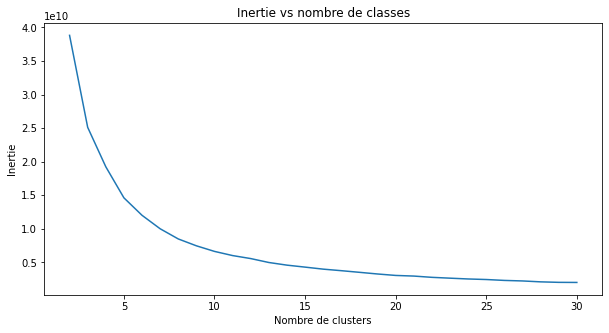

In [ ]:
# on représente le graphique
fig=plt.figure(figsize=(10, 5))
plt.plot(range(2, 31), inerties)
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title('Inertie vs nombre de classes')

In [ ]:
#detecter La valeur optimale de K
from kneed import KneeLocator
knee_locator = KneeLocator(range(2,31), inerties, S=1.0, curve='convex', direction='decreasing')
k=knee_locator.elbow
print('La valeur optimale de K est:',k)

La valeur optimale de K est: 8


# Application de K-means

In [ ]:
kmeans= models[k - 2] 
print(kmeans.cluster_centers_)


[[-7535.48925102  6093.09802736]
 [23061.25121701 -3148.08131583]
 [-7751.86682934   665.66184143]
 [ 9752.99520179 -1285.94005952]
 [-7749.63040481 -3204.21697828]
 [-1023.71280583 -1009.33709158]
 [22361.55241161  5890.83718881]
 [ 3288.00478341  5585.31968475]]


In [ ]:
print(kmeans.labels_)

[1 3 2 ... 2 2 2]


# coefficient silhouette de KMeans.

In [ ]:
from sklearn import metrics    
metrics.silhouette_score(data_pca, kmeans.labels_)

0.44095189203502855

#  Segmentation des communes selon les caractéristiques sociodémographiques.

In [ ]:
print(kmeans.labels_)
seg_com = pd.DataFrame({'comp_principal1': data_pca[:, 0],'comp_principal2': data_pca[:, 1],'cluster': kmeans.labels_,'libgeo': lib,
      'latitude': position["latitude"],'longitude': position["longitude"]})
seg_com

[1 6 7 ... 7 7 7]


,comp_principal1,comp_principal2,cluster,libgeo,latitude,longitude
0,22934.165748,-1388.743590,1,Saint-Gratien,2.284701,48.969504
1,6320.101801,-2951.550201,6,Pierrelaye,2.160687,49.019079
2,-9006.014122,325.188806,7,Saint-Cyr-en-Arthies,1.741763,49.058878
3,-8036.891074,-4449.060127,0,La Roche-Guyon,1.634428,49.088342
4,-8099.833804,2715.816352,7,Villiers-Adam,2.238474,49.069760
...,...,...,...,...,...,...
1295,23487.562730,-995.446099,1,Sannois,2.253364,48.971575
1296,18434.598082,3205.255200,4,Saint-Leu-la-Forêt,2.246662,49.018795
1297,-9122.814698,672.688820,7,Villiers-le-Sec,2.386345,49.074577
1298,-9014.351844,1556.547949,7,Théméricourt,1.905007,49.090819


In [ ]:
px.scatter(
    seg_com,
    x = 'comp_principal1',
    y = 'comp_principal2',
    color = 'cluster',
    hover_data = ['libgeo']
)

In [ ]:
fig = px.scatter_mapbox(seg_com,lat = "latitude",lon = "longitude",color = "cluster",hover_data = ['libgeo'],
                        size_max = 22,zoom =8.5, color_continuous_scale = px.colors.cyclical.IceFire,
                        mapbox_style = "carto-darkmatter")
fig.show()

In [ ]:
fig = px.scatter_mapbox(seg_com,lat = "latitude",lon = "longitude",color = "cluster",hover_data = ['libgeo'],
                        size_max = 18,zoom =6.9, color_continuous_scale = px.colors.cyclical.IceFire,
                        mapbox_style = "carto-positron")
fig.show()